In [59]:
import pandas as pd
import os
os.chdir("I:\\my_ml\\Dataset")
os.getcwd()
movies = pd.read_csv("Movie-Ratings.csv")
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [60]:
#Fix the spaces in the columns
movies.columns=['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']
movies.head()
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
Film              562 non-null object
Genre             562 non-null object
CriticRating      562 non-null int64
AudienceRating    562 non-null int64
BudgetMillions    562 non-null int64
Year              562 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.4+ KB


,CriticRating,AudienceRating,BudgetMillions,Year
count,562.000000,562.000000,562.000000,562.000000
mean,47.403915,58.830961,50.104982,2009.145907
std,26.392394,16.827792,48.638482,1.361578
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [61]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
Film              562 non-null category
Genre             562 non-null category
CriticRating      562 non-null int64
AudienceRating    562 non-null int64
BudgetMillions    562 non-null int64
Year              562 non-null category
dtypes: category(3), int64(3)
memory usage: 19.9 KB


In [14]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,562.000000,562.000000,562.000000
mean,47.403915,58.830961,50.104982
std,26.392394,16.827792,48.638482
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


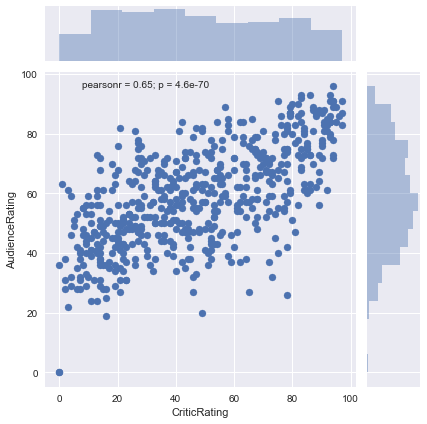

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Join plot
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')


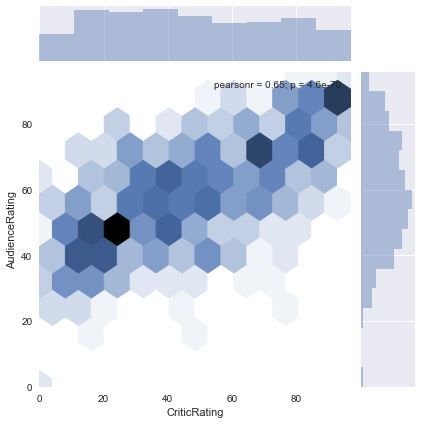

In [21]:
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind='hex')

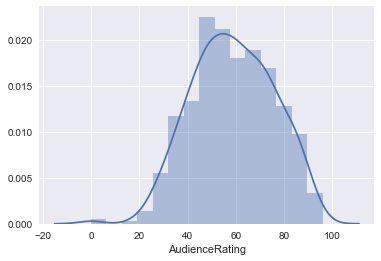

In [63]:
##Histograms for Audience Rating
m1 = sns.distplot(movies.AudienceRating,bins=15)

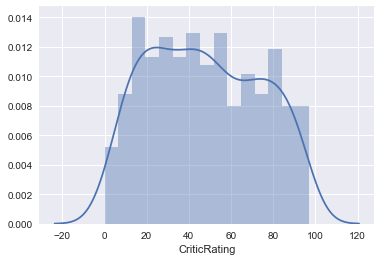

In [64]:
m1 = sns.distplot(movies.CriticRating,bins=15)

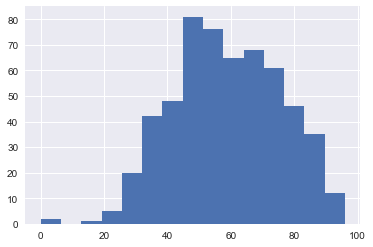

In [29]:
n1 = plt.hist(movies.AudienceRating, bins=15)

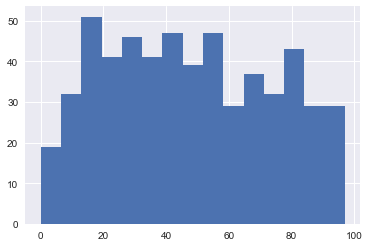

In [31]:
n2 = plt.hist(movies.CriticRating, bins=15)

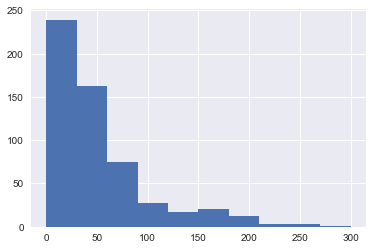

In [33]:
##Stacked Histograms
plt.hist(movies.BudgetMillions)
plt.show()

In [65]:
FilterDrama = movies.Genre=='Drama'
movies[FilterDrama]
movies[FilterDrama].BudgetMillions

10      30
11      20
13       7
18       8
23      20
26       8
27      30
47      13
53      26
55       2
56      55
62      55
74      15
84      25
96      37
99      25
112     60
116     21
117      5
119     31
120     40
128      1
131     24
132     21
151     33
158     16
171      7
195     15
199     35
213     10
      ... 
437     13
442     20
444      2
445     20
446     40
450     65
457     40
466     45
467     11
470     60
480     39
482     32
483     68
484     50
487      0
488      4
489    150
490     16
492     25
509     20
510     10
512      2
517     25
525     26
529     70
531     66
534     38
536     21
543     15
547      2
Name: BudgetMillions, dtype: int64

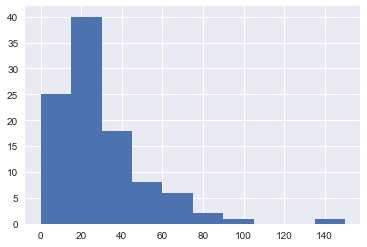

In [37]:
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions)
plt.show()

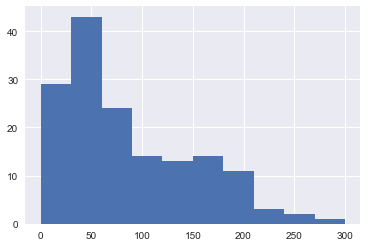

In [38]:
plt.hist(movies[movies.Genre=='Action'].BudgetMillions)
plt.show()

In [ ]:
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions)
plt.show()

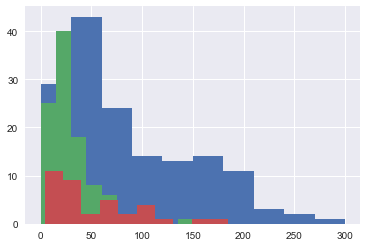

In [39]:
plt.hist(movies[movies.Genre=='Action'].BudgetMillions)
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions)
plt.show()


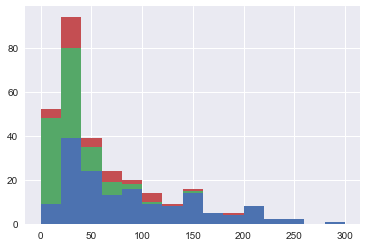

In [41]:
## Below code remove the overlaying and stacked
plt.hist([movies[movies.Genre=='Action'].BudgetMillions,\
                movies[movies.Genre=='Drama'].BudgetMillions, \
                movies[movies.Genre=='Thriller'].BudgetMillions], bins =15, stacked=True)
plt.show()

In [66]:
list1 = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
print(list1)

[2       20
5      200
15      35
29      20
30      20
33     237
36      45
39      45
40      70
45     150
49      68
52      17
58     140
60      85
63      40
66     125
67      25
69      40
70      90
73      30
76     163
77      13
81      25
83      20
86      45
94      30
98      33
101     75
102     30
106     45
      ... 
433    138
435     50
439     40
441     80
443    150
448     25
451     40
454    145
458    100
472    150
473      6
474      0
477    100
479     75
493    150
495     35
499    150
500    195
501    210
502     30
504    170
513     35
515     95
530     75
532     25
533    130
544     35
548    150
549    160
560     24
Name: BudgetMillions, dtype: int64, 1      105
3       18
19     200
21      45
24      40
32      78
46      20
65      38
68     140
130     73
165     12
166    125
167    250
168    150
176     36
178    150
192     70
193     60
241     60
272     37
341     19
363     70
386    130
401    155
459     59
463     25
506   

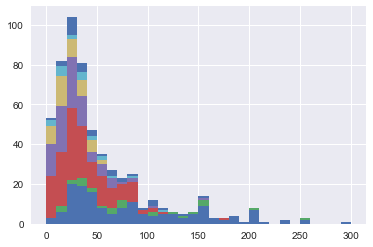

In [49]:
h = plt.hist(list1, bins=30, stacked=True, rwidth=12)

In [ ]:
mylabels

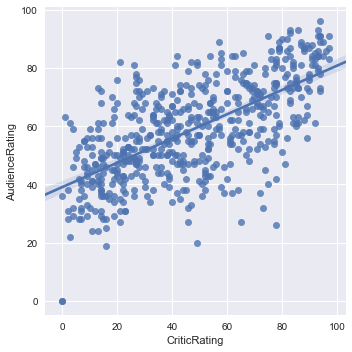

In [69]:
vis1 = sns.lmplot(data=movies, x='CriticRating',y='AudienceRating')


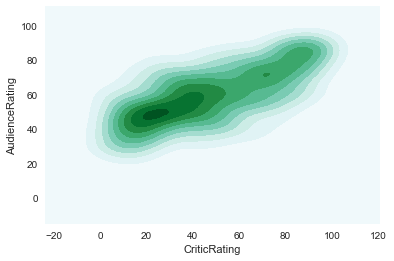

In [71]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True)

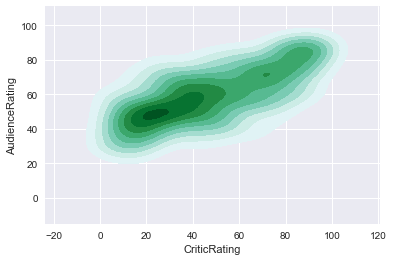

In [73]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False)

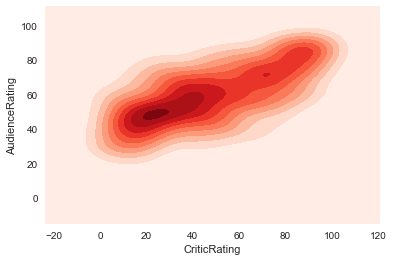

In [75]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, cmap='Reds')

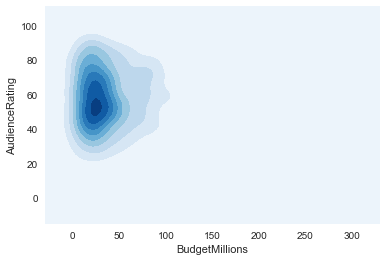

In [79]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, cmap='Blues')


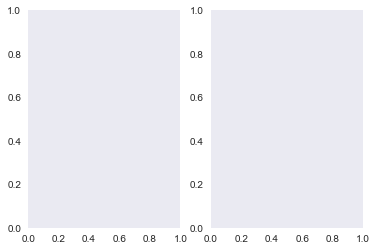

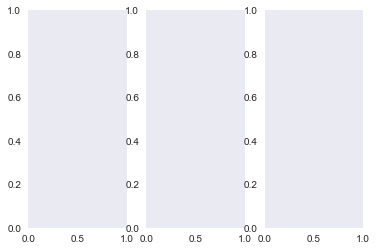

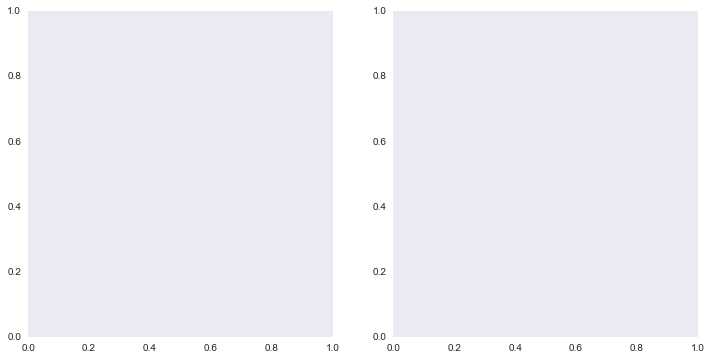

In [82]:
## Sub plo
f, ax = plt.subplots(1,2) # gives 1 row and 2 columns
f,ax = plt.subplots(1,3)# Gives 1 row and 3 columsn
f,ax = plt.subplots(1,2, figsize=(12,6))

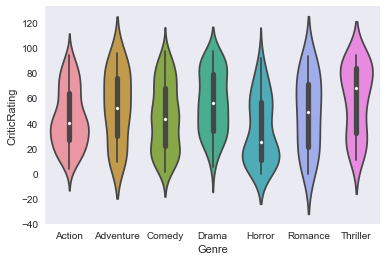

In [83]:
##Violin plots
z = sns.violinplot(data=movies,x='Genre',y='CriticRating')

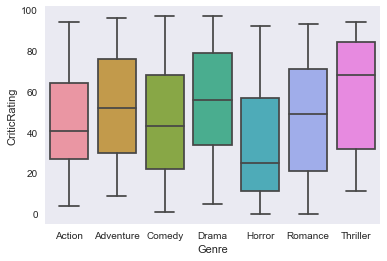

In [84]:
z = sns.boxplot(data=movies,x='Genre',y='CriticRating')

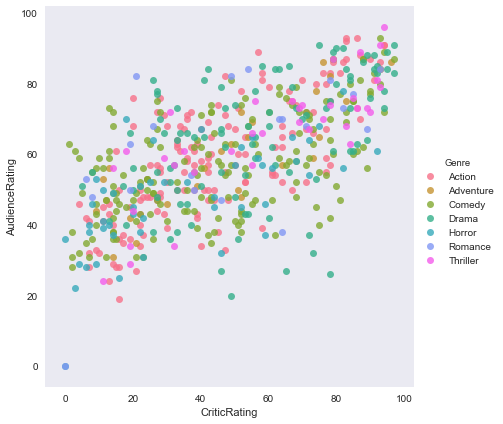

In [86]:
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',\
                 fit_reg=False,hue='Genre',\
                 size=6,aspect=1)

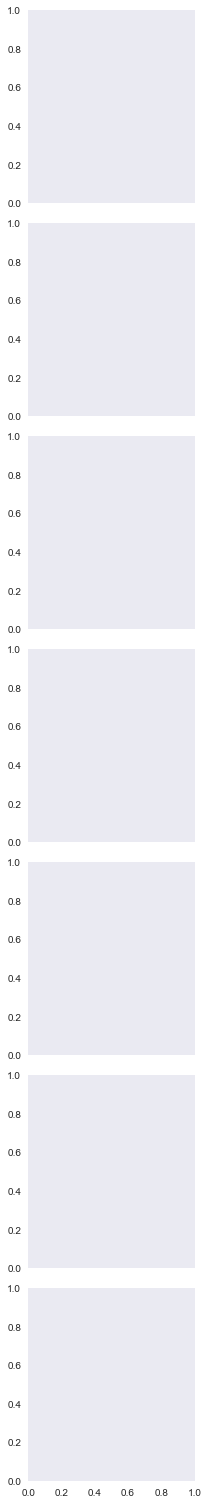

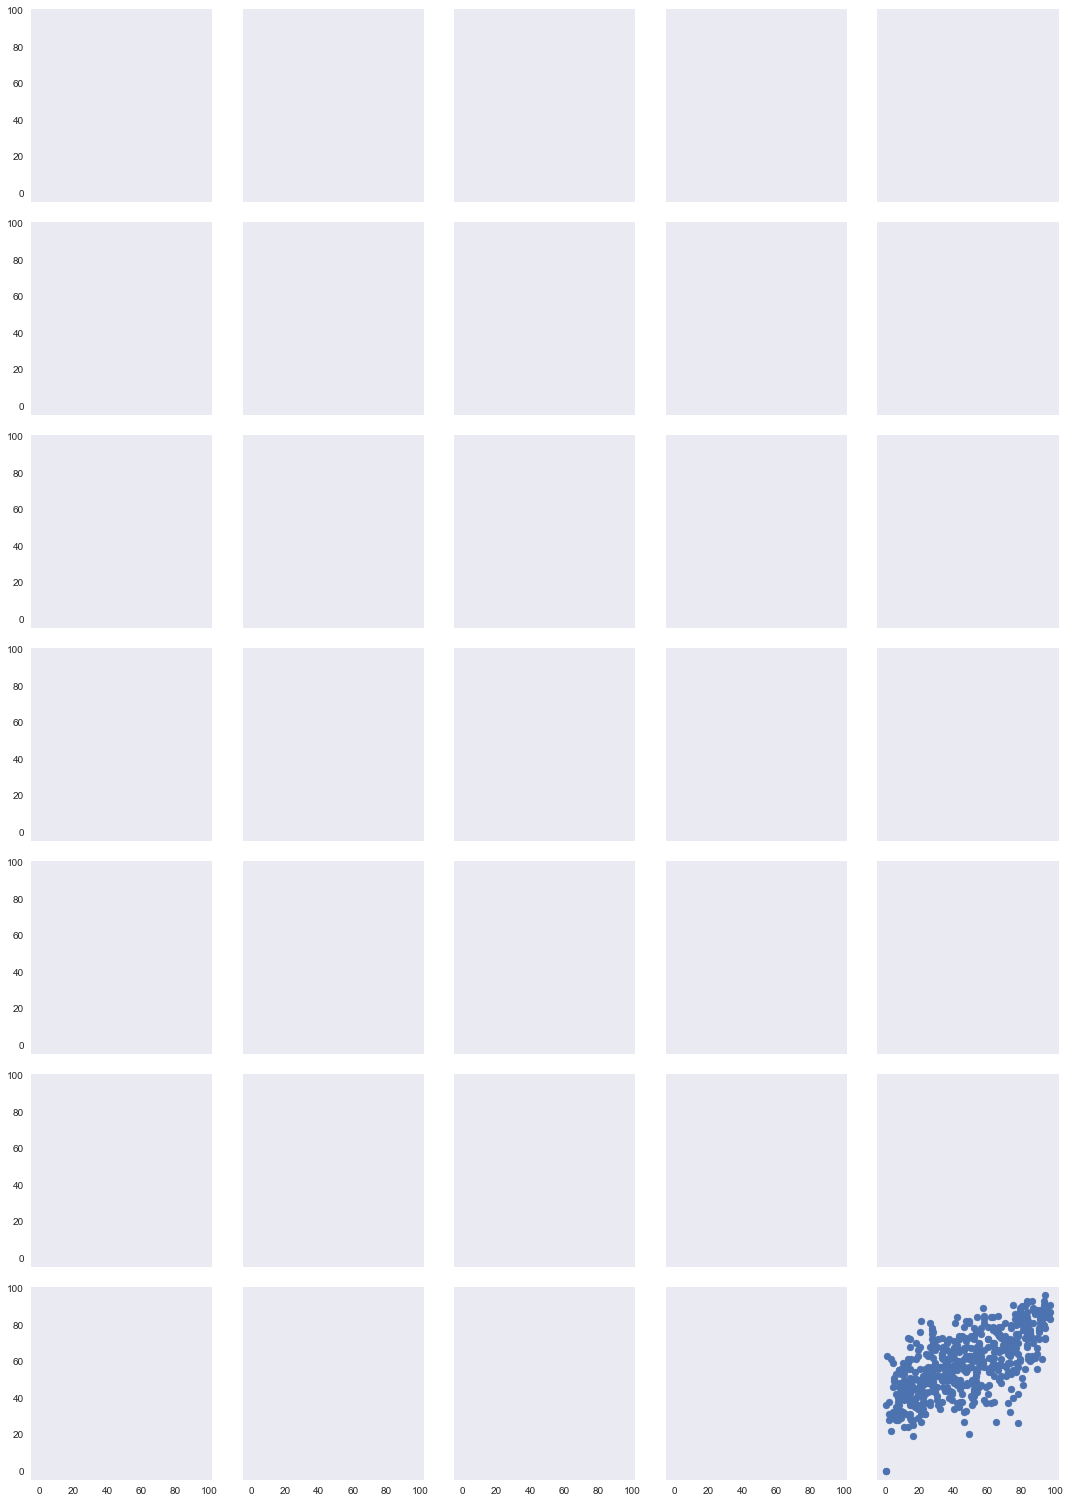

In [89]:
g = sns.FacetGrid(movies,row='Genre',hue='Genre')
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
plt.scatter(movies.CriticRating,movies.AudienceRating)

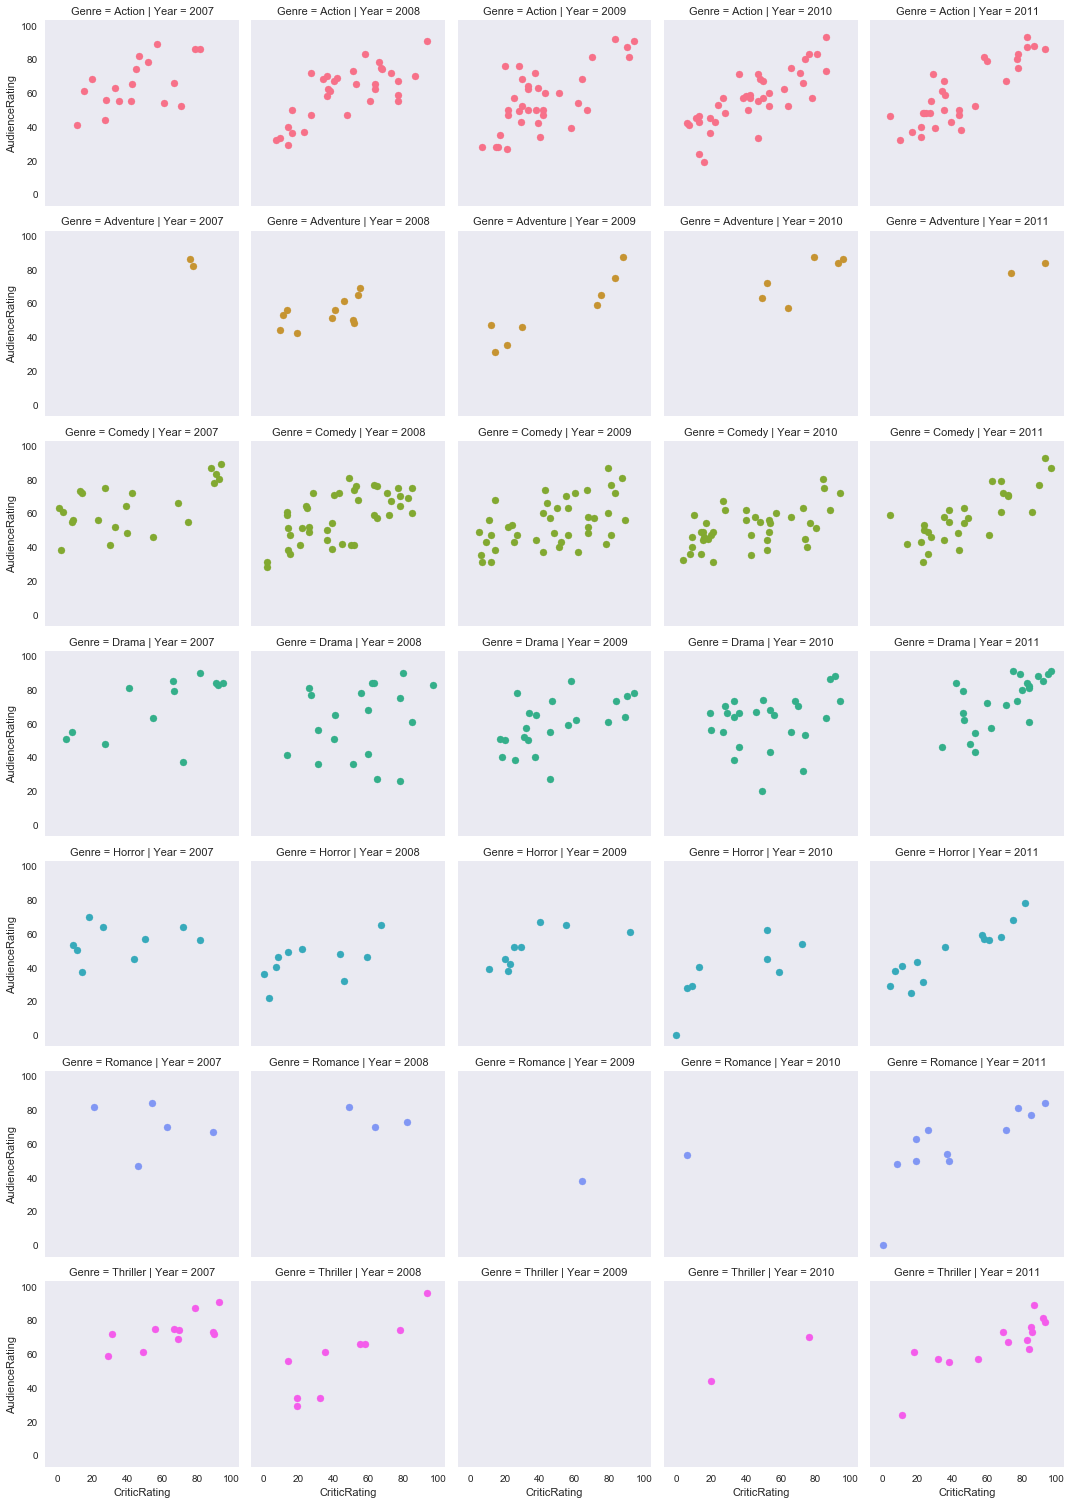

In [90]:
#How we want to map the scatter plot into the FG
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g.map(plt.scatter,'CriticRating','AudienceRating')

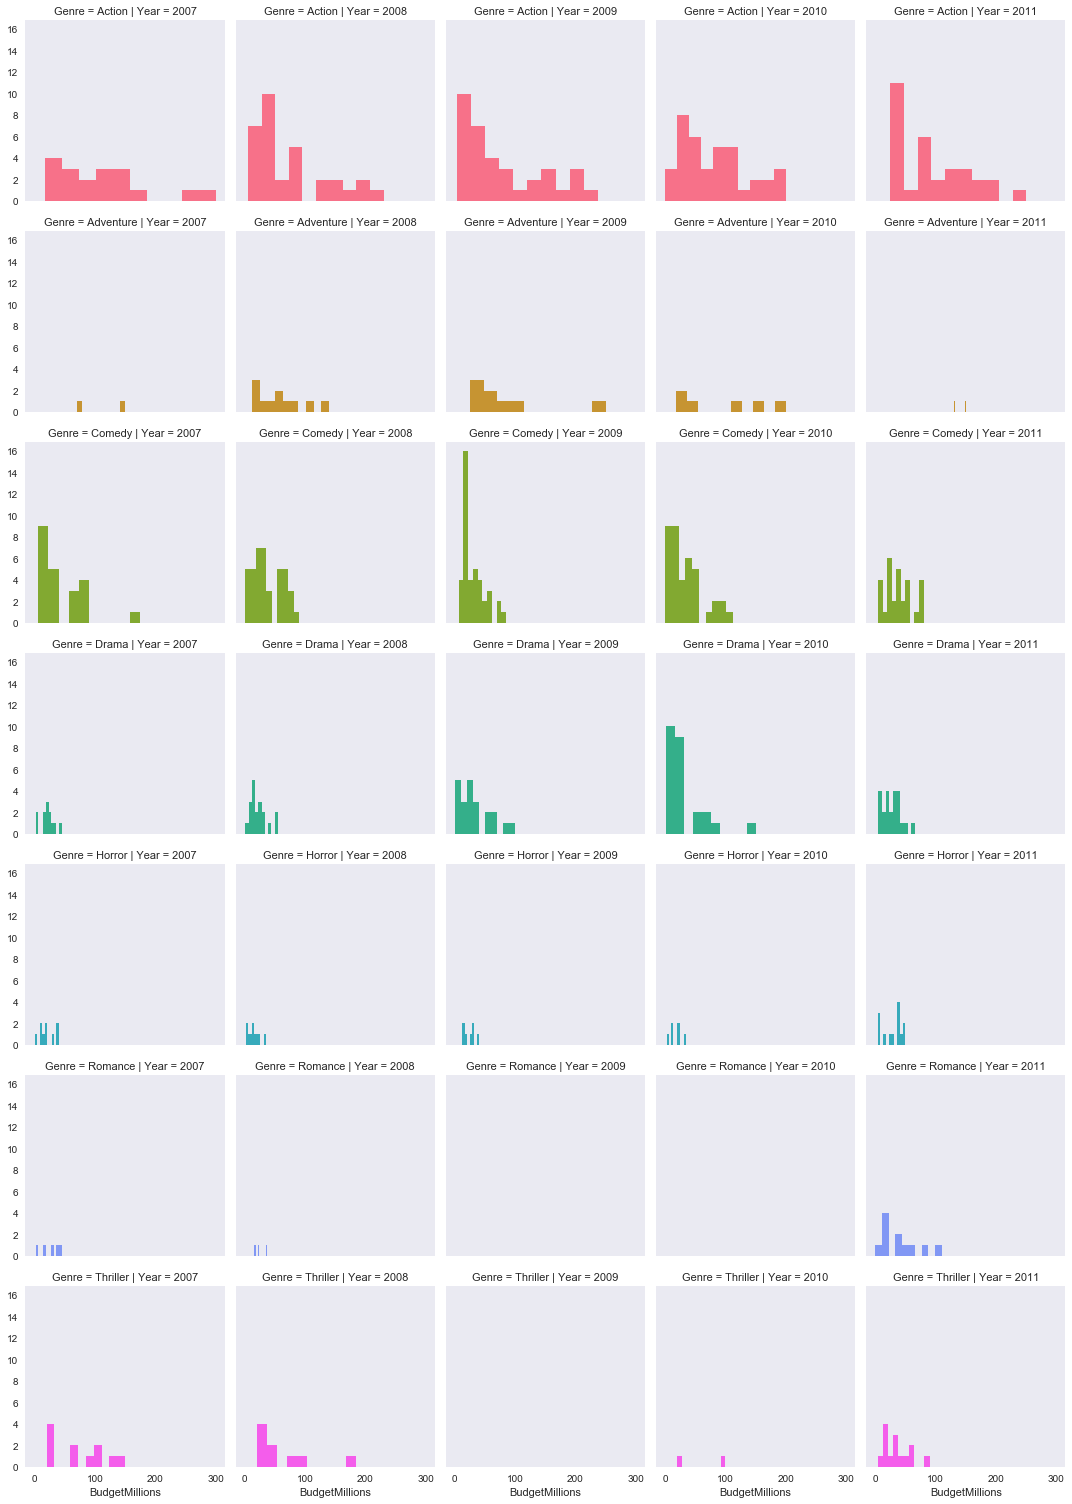

In [91]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g.map(plt.hist,'BudgetMillions')